<a href="https://colab.research.google.com/github/ttatsato/colaboratory-exercise/blob/master/%E6%89%8B%E6%9B%B8%E3%81%8D%E6%95%B0%E5%AD%97%E3%82%92%E5%88%86%E9%A1%9E%E3%81%99%E3%82%8B.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

['DESCR', 'data', 'images', 'target', 'target_names']
(1797, 64)
(1797,)
[[ 0.  0.  5. ...  0.  0.  0.]
 [ 0.  0.  0. ... 10.  0.  0.]
 [ 0.  0.  0. ... 16.  9.  0.]
 ...
 [ 0.  0.  1. ...  6.  0.  0.]
 [ 0.  0.  2. ... 12.  0.  0.]
 [ 0.  0. 10. ... 12.  1.  0.]]
[[ 0.  0.  5. 13.  9.  1.  0.  0.]
 [ 0.  0. 13. 15. 10. 15.  5.  0.]
 [ 0.  3. 15.  2.  0. 11.  8.  0.]
 [ 0.  4. 12.  0.  0.  8.  8.  0.]
 [ 0.  5.  8.  0.  0.  9.  8.  0.]
 [ 0.  4. 11.  0.  1. 12.  7.  0.]
 [ 0.  2. 14.  5. 10. 12.  0.  0.]
 [ 0.  0.  6. 13. 10.  0.  0.  0.]]


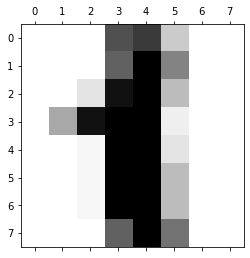

1
1


In [20]:
# 手書き数字を分類する ~データセットの中身を確かめる~

from sklearn import datasets;
digits = datasets.load_digits();

dir(digits);
print(dir(digits));
# 'DESCR' ... データセットの説明文
# 'data' ... 画像データ
# 'images' ... 画像データを8行8列にしたもの
# 'target' ... 画像データに対する数字
# 'target_names' ... targetデータの名前

# データの説明を出力する
# print(digits.DESCR);

# データの構造を調べる(shape)

print(digits.data.shape);
# >>> (1797, 64) 1797 * 64 の２次配列

print(digits.target.shape);
# >>> (1797) 要素が1797の1次配列

print(digits.data);

print(digits.images[0]);

import matplotlib.pyplot as plt
plt.matshow(digits.images[1], cmap="Greys");
plt.show();

print(digits.target[1]);
print(digits.target_names[1]);

In [34]:
# 手書き数字を分類する ~機械学習を行う~
from sklearn import datasets, svm;


digits = datasets.load_digits();

# 訓練データ(2/3)とテストデータ(1/3)に分ける
n_train = len(digits.data) * 2//3;
X_train = digits.data[:n_train];
Y_train = digits.target[:n_train];
X_test = digits.data[n_train:];
Y_test = digits.target[n_train:];
print('分けられたか数値を確認');
print([d.shape for d in [digits.data, X_train, Y_train, X_test, Y_test]]);

# 分類機を用いて学習したモデルを作る
clf = svm.SVC(gamma=0.001);
clf.fit (X_train, Y_train);

# テストデータで評価する
print(clf.score(X_test, Y_test))

# 学習済みモデルが誤って分類した個数を調べる
predicted = clf.predict(X_test);

print("正解の分類結果と一致しなかった数の合計値")
print((Y_test != predicted).sum());

# 学習結果をレポートする
from sklearn import metrics
print("---- sklearnを使用してレポートを表示する")
print(metrics.classification_report(Y_test, predicted));

print("---- 数字ごとに正解数と読み間違えた数字をみる")
print(metrics.confusion_matrix(Y_test, predicted));

print("---- 画像で確認する")
import matplotlib.pyplot as plt

分けられたか数値を確認
[(1797, 64), (1198, 64), (1198,), (599, 64), (599,)]
0.9632721202003339
正解の分類結果と一致しなかった数の合計値
22
---- sklearnを使用してレポートを表示する
              precision    recall  f1-score   support

           0       1.00      0.98      0.99        59
           1       0.97      1.00      0.98        62
           2       1.00      0.98      0.99        60
           3       0.96      0.81      0.88        62
           4       0.98      0.95      0.97        62
           5       0.95      0.98      0.97        59
           6       0.98      0.98      0.98        61
           7       0.95      1.00      0.98        61
           8       0.89      0.98      0.93        55
           9       0.95      0.97      0.96        58

    accuracy                           0.96       599
   macro avg       0.96      0.96      0.96       599
weighted avg       0.96      0.96      0.96       599

---- 数字ごとに正解数と読み間違えた数字をみる
[[58  0  0  0  1  0  0  0  0  0]
 [ 0 62  0  0  0  0  0  0  0  0]
 [ 0  0 59  1 